   defects  group_size
0        3          10
1        4          10
2        1          10
3        3          10
4        3          10
5        4          10
6        1          10
7        1          10
8        3          10
9        2          10
All points within control limits.


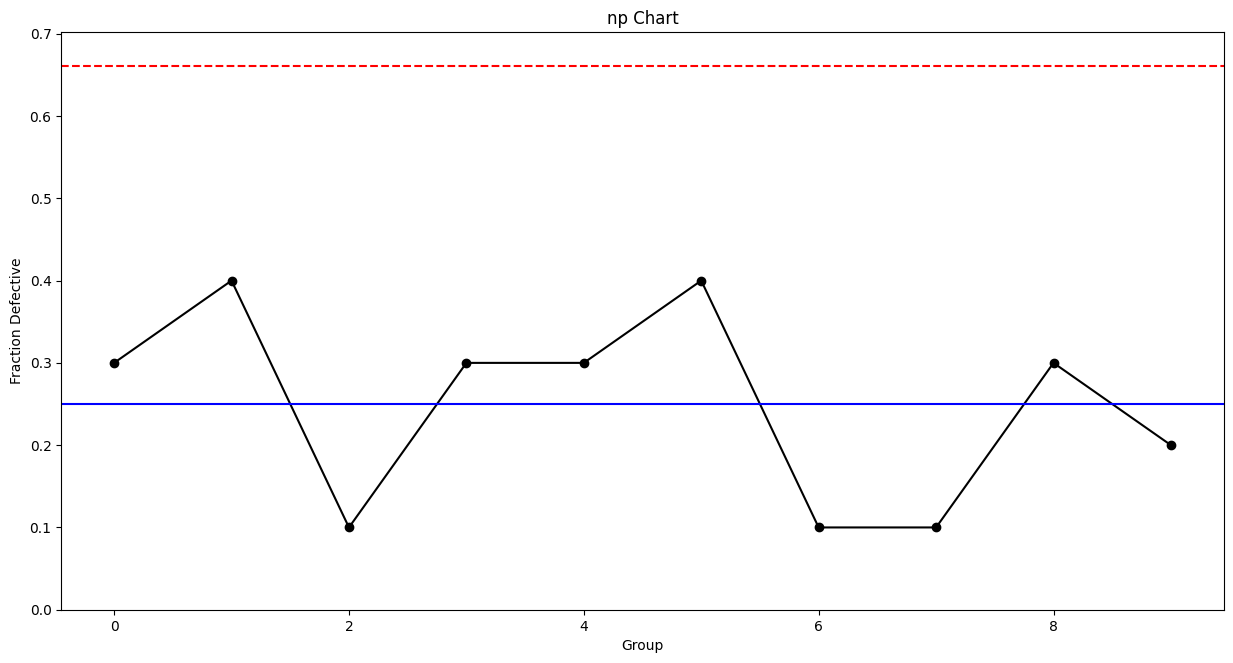

In [3]:
### np-chart ###

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
data = {'defects':np.random.randint(1,5,10).tolist(),
        'group_size':np.repeat(10,10).tolist()}

# Convert data to data frame
data = pd.DataFrame(data)
print(data)
# Add 'np' column to data frame
data['np'] = data['defects']/data['group_size']

# Plot np-chart
plt.figure(figsize=(15,7.5))
plt.plot(data['np'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(data['np'])+3*(np.sqrt((statistics.mean(data['np'])*(1-statistics.mean(data['np'])))/statistics.mean(data['group_size']))), color='red', linestyle='dashed')
plt.axhline(statistics.mean(data['np'])-3*(np.sqrt((statistics.mean(data['np'])*(1-statistics.mean(data['np'])))/statistics.mean(data['group_size']))), color='red', linestyle='dashed')
plt.axhline(statistics.mean(data['np']), color='blue')
plt.ylim(bottom=0)
plt.title('np Chart')
plt.xlabel('Group')
plt.ylabel('Fraction Defective')

# Validate points out of control limits
i = 0
control = True
for group in data['np']:
    if group > (statistics.mean(data['np'])+3*(np.sqrt((statistics.mean(data['np'])*(1-statistics.mean(data['np'])))/statistics.mean(data['group_size'])))) or group < (statistics.mean(data['np'])-3*(np.sqrt((statistics.mean(data['np'])*(1-statistics.mean(data['np'])))/statistics.mean(data['group_size'])))):
        print('Group', i, 'out of fraction defective cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
